---
title: "Preprocessing and Pipelines"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-06"
categories: [python, datacamp, machine learning, supervised ]
image: "preprocessing.jpg"

---

# Preprocessing and Pipelines

Learn how to impute missing values, convert categorical data to numeric values, scale data, evaluate multiple supervised learning models simultaneously, and build pipelines to streamline your workflow!

This **Preprocessing and Pipelines** is part of [Datacamp course: Supervised Learning with scikit-learn](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)

This is my learning experience of data science through DataCamp

**Exploring categorical features**

Gapminder datasets that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped since we didn't have the tools. We have added it back in now that you know about it!

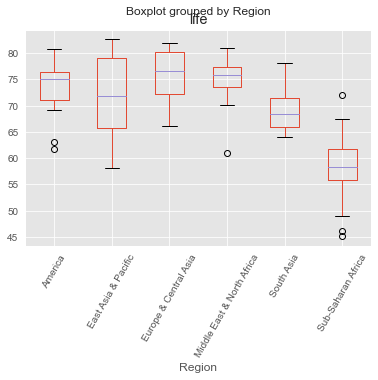

In [15]:
import matplotlib.pyplot as plt
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv("gm_2008_region.csv")

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

**Creating dummy variables**

Scikit-learn does not accept non-numerical features. Earlier we have learned that the 'Region' feature contains useful information for predicting life expectancy. Compared to Europe and Central Asia, Sub-Saharan Africa has a lower life expectancy. Thus, retaining the 'Region' feature is preferable if we are trying to predict life expectancy. In this exercise, we

In [16]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)
print(df.sample(10))

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)
print(df.sample(10))

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
      population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  \
106  143123163.0       1.49  1.0  11.982718  26.01131  22506.0    128.4903   
79      406392.0       1.38  0.1   6.182771  27.68361  27872.0    124.1571   
121    9226333.0       1.92  0.1   5.315688  26.37629  43421.0    122.9473   
109    9109535.0       1.41  0.1   5.271223  26.51495  12522.0    130.3755   
37     6004199.0       2.32  0.8   1.067765  26.36751   7450.0    119.9321   
89    16519862.0       1.77  0.2  10.533028  26.01541  47388.0    121.6950   
30    19261647.0       4.91  3.7   0.361897  22.56469   2854.0    131.5237   
83     4111168.0       1.49  0.4   1.313321  24.23

**Using categorical features in regression**

We can now build regression models using the dummy variables we have created using the 'Region' feature. We will perform 5-fold cross-validation here using ridge regression.

In [17]:
import pandas as pd
import numpy as np

df=pd.read_csv('gm_2008_region.csv')
df_region=pd.get_dummies(df)
df_region=df_region.drop('Region_America',axis=1)
X=df_region.drop('life',axis=1).values
y=df_region['life'].values

In [18]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a prepro

**Dropping missing data**

Earlier excercise voting dataset contained a bunch of missing values that we handled behind the scenes. Now it's your turn!

DataFrame df loaded with unprocessed dataset. Use the .head() method in the IPython Shell. Some data points are labeled with '?'. Missing values are here. Different datasets encode missing values differently. Data in real life can be messy - sometimes a 9999, sometimes a 0. It's possible that the missing values are already encoded as NaN. By using NaN, we can take advantage of pandas methods like .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

This exercise requires you to convert '? to NaNs, and then drop the rows that contain them.

In [19]:
df=pd.read_csv('house-votes-84.csv', header=None, names = ['infants', 'water', 'budget', 'physician', 'salvador', 'religious',
 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education',
 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])
df=df.reset_index()
df.rename(columns ={'index':'party'},inplace=True)

df[df=='y']=1
df[df=='n']=0

In [20]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in

**Imputing missing data in a ML Pipeline I**

The process of building a model involves many steps, such as creating training and test sets, fitting a classifier or regressor, tuning its parameters, and evaluating its performance. In this machine learning process, imputation is the first step, which is viewed as part of a pipeline. With Scikit-learn, we can piece together these steps into one process and simplify your workflow.

We will now practice setting up a pipeline with two steps: imputation and classifier instantiation. We have so far tried three classifiers: k-NN, logistic regression, and decision trees. The Support Vector Machine, or SVM, is the fourth. Don't worry about how it works. As with the scikit-learn estimators we have worked with before, it has the same .fit() and .predict() methods.

In [21]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

**Imputing missing data in a ML Pipeline II**

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors!

In [22]:
import pandas as pd
import numpy as np
#
df = pd.read_csv('votes-ch1.csv')
# Create arrays for the features and the response variable. As a reminder, the response variable is 'party'
y = df['party'].values
X = df.drop('party', axis=1).values

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        85
  republican       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



**Centering and scaling your data**

In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! Hugo used the Red Wine Quality dataset in the video. We have used the 'quality' feature of the wine to create a binary target variable: If 'quality'is less than 5, the target variable is 1, and otherwise, it is 0.

The DataFrame has been pre-loaded as df, along with the feature and target variable arrays X and y. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. 'density', for instance, takes values between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

In [23]:
df = pd.read_csv('white-wine.csv')
X = df.drop('quality' , 1).values # drop target variable
y1 = df['quality'].values
y = y1 <= 5

# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X)))
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled)))
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7452128118308485e-15
Standard Deviation of Scaled Features: 0.9999999999999999


C:\Users\dghr201\AppData\Local\Temp\ipykernel_23428\525489148.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('quality' , 1).values # drop target variable


**Centering and scaling in a pipeline**

With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

In [24]:
# modified/added by Jinny
import pandas as pd
df = pd.read_csv('white-wine.csv')
X = df.drop('quality' , 1).values # drop target variable
y1 = df['quality'].values
y = y1 <= 5

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


C:\Users\dghr201\AppData\Local\Temp\ipykernel_23428\594620727.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('quality' , 1).values # drop target variable


Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


Fantastic! It looks like scaling has significantly improved model performance!

**Bringing it all together I: Pipeline for classification**

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C and gamma. C controls the regularization strength. It is analogous to the you tuned for logistic regression in Chapter 3, while gammagamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

In [25]:
import pandas as pd
df = pd.read_csv('white-wine.csv')
X = df.drop('quality' , 1).values # drop target variable
y1 = df['quality'].values
y = y1 <= 5
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

C:\Users\dghr201\AppData\Local\Temp\ipykernel_23428\2362924875.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('quality' , 1).values # drop target variable


In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters,cv=3)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

**Bringing it all together II: Pipeline for regression**

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

In [ ]:


# modified/added by Jinny
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('gapminder-clean.csv')

y = df['life'].values
X = df.drop('life', axis=1).values

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:


# Setup the pipeline steps: steps
# modified by Jinny: Imputer -> SimpleImputer
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
